# MDI220
# Statistiques

# Mini-project

Ce mini-projet est pour le cours Statistiques MDI220.

Vous devez remplir ce notebook et le uploader sur eCampus, **avec les figures**. S'il vous plaît, assurez-vous que le notebook s'execute **sans erreurs**.

Vous pouvez accomplir ce projet en français ou en anglais (votre préférence).

Vous pouvez travailler en equipe, mais le notebook final, compris le texte et le code, doit être **votre propre**. Plagiat entre les étudiants est strictement interdit.

S'il vous plaît, donner **la réponse concise** et **le code concis**, avec des commentaires ou approprié.

(Re)nommer le fichier de ce notebook dans le format suivant : "NOM_Prenom_projet_MDI220.ipynb".

## Votre nom: **AMDOUNI Wiem**

## Imports

S'il vous plaît, **n'importez pas** d'autres librairies.

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [231]:
from scipy.stats import norm, chi2, gaussian_kde

In [232]:
import seaborn as sns

## Données

Nous considérons les données de **consomation quotidienne d'electricité** (en MW) en France dans le période 2013-2023. Les données sont accessibles sur **eCampus**.

Les informationnes détaillées sur les données sont accessible [ici](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [233]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [234]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [235]:
regions = list(df.region.unique())

In [236]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [237]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [238]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int64

In [239]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

In [240]:
df_region.head()

,region,date,consumption
7606,Bretagne,2013-01-01,2595
7607,Bretagne,2013-01-02,3195
7608,Bretagne,2013-01-03,3157
7609,Bretagne,2013-01-04,3142
7610,Bretagne,2013-01-05,2859


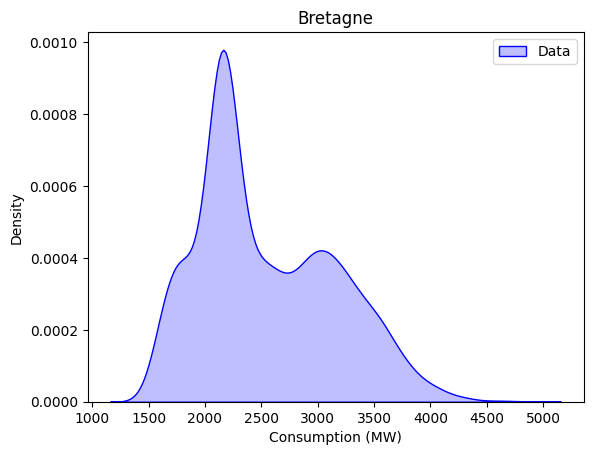

In [241]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

## A. Estimation ponctuelle

Dans l'entité du projet, consomation quotidienne d'electricité est supposée i.i.d., avec la distribution gaussienne.

Nous allons utiliser les estimateurs suivants pour la moyenne et la variance, pour $n$ observations $x_1,\ldots,x_n$ :
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
L'estimateur correspondant de l'écart-type est :
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Considérons la region Bretagne.

1. Montrez que les estimateur pour la moyenne et la variance sont sans biais.

Votre réponse :

On a:
$$
b(\mu,\hat \mu)=\mathbb{E}(\hat \mu - \mu) = \mathbb{E}(\frac 1 n \sum_{i=1}^n x_i -\mu)=\frac 1 n \sum_{i=1}^n \mathbb{E}( x_i) - \mathbb{E}(\mu)= \frac 1 n \sum_{i=1}^n \mu - \mu = \frac 1 n n \mu - \mu = 0
$$
Donc l'estimateur pour la moyenne est sans biais.

$$
b(\sigma^2,\hat{\sigma}^2)=\mathbb{E}(\hat{\sigma}^2-\sigma^2)= \mathbb{E}(\frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2-\sigma^2)=\frac 1 {n-1} \sum_{i=1}^n \mathbb{E}( (x_i - \hat \mu)^2) - \mathbb{E}({\sigma}^2)=\frac 1 {n-1} \sum_{i=1}^n \mathbb{E}({x_i}^2 + 2x_i\hat \mu +{\hat \mu}^2 ) - {\sigma}^2= \frac 1 {n-1} \sum_{i=1}^n \Big(\mathbb{E}({x_i}^2) - 2\mathbb{E}(x_i\hat \mu) +\mathbb{E}({\hat \mu}^2)\Big) - {\sigma}^2=\frac 1 {n-1} \sum_{i=1}^n \Big(\mathbb{E}({x_i}^2) - 2\mathbb{E}(x_i\frac 1 n \sum_{j=1}^n x_j) +\mathbb{E}({\hat \mu}^2)\Big) - {\sigma}^2
$$

Comme les n observations  $x_1,…,x_n$ sond $i.i.d$, alors $ \space\mathbb{E}(x_ix_j)=\mathbb{E}(x_i)\mathbb{E}(x_j) \space \forall i\neq j$ et on a :

$$
\mathbb{E}(x_i\frac 1 n \sum_{j=1}^n x_j)= \frac {n-1}n\mathbb{E}(x_i)^2+\frac {1}n\mathbb{E}(x_i^2)=\mu^2+\frac {1}n\sigma^2
$$

et
$$
b(\sigma^2,\hat{\sigma}^2)=\frac 1 {n-1} \sum_{i=1}^n \Big(\mathbb{E}({x_i}^2) - 2(\mu^2+\frac {1}n\sigma^2) +\mathbb{E}({\hat \mu}^2)\Big) - {\sigma}^2=\frac 1 {n-1} \sum_{i=1}^n \Big(\sigma^2 +\mu^2  - 2(\mu^2+\frac {1}n\sigma^2) +\mathbb{E}({\hat \mu}^2)\Big) - {\sigma}^2
$$
et comme: $
\mathbb{E}({\hat \mu}^2)= \frac 1 {n^2}\sum_{i=1}^n\sum_{k=1}^n \mathbb{E}(x_i,x_j)=\frac 1 {n^2}\sum_{j=1}^n\Big((n-1)\mu^2+\sigma^2+\mu^2\Big)=\frac 1 {n^2}\Big(n\mu^2+n\sigma^2\Big)=\mu^2+\frac 1 {n}\sigma^2
$


Donc:
$$
b(\sigma^2,\hat{\sigma}^2)=\frac 1 {n-1} \sum_{i=1}^n \Big(\sigma^2 +\mu^2  - 2(\mu^2+\frac {1}n\sigma^2) +\mu^2+\frac 1 {n}\sigma^2\Big) - {\sigma}^2=\frac n {n-1}\Big(\sigma^2 +\mu^2  - 2(\mu^2+\frac {1}n\sigma^2) +\mu^2+\frac 1 {n}\sigma^2\Big) - {\sigma}^2=\frac n {n-1}\Big(\sigma^2 -\frac {1}n\sigma^2\Big) - {\sigma}^2=\frac n {n-1}\frac {n-1}n \sigma^2- {\sigma}^2= \sigma^2- {\sigma}^2=0
$$
Ainsi l'estimateur pour la variance est sans biais.

2. Donnez les valeurs obtenues pour la moyen et pour la variance en utilisant ces estimateurs.

In [242]:
#la moyenne empirique
moy_estimateur=df_region.consumption.mean()
#la variance empirique
var_estimateur=df_region.consumption.var(ddof=1)# ddof = 1 pour que la variance soit non biaisée.
#Affichage des résultats
print("la moyenne empirique est  ",moy_estimateur, '\n la variance empirique non biaisé est ', var_estimateur,
      "\n et l'ecart type empirique non biasé est ",np.sqrt(var_estimateur))


la moyenne empirique est   2546.536155666579 
 la variance empirique non biaisé est  365956.0141448174 
 et l'ecart type empirique non biasé est  604.9429842099315


3. Générez les nouvelles données en utilisant le modèle gaussien avec ces estimateurs, et avec le même nombre d'observations.

In [243]:
n_observations = df_region.shape[0]#nombre d'observations
#nouvelles données générées en utilisant le modèle gaussien
nouv_data = np.random.normal(moy_estimateur, np.sqrt(var_estimateur), n_observations)
print(nouv_data)


array([2314.72585386, 2990.13363472, 2428.04828017, 2281.9729384 ,
       2672.78691362])

4. Tracez l'estimateur à noyau de la densité  *kde* (kernel density estimate) des données réelles et des données générées sur la même figure.

In [244]:
#Transformer les nouvelles données générées en DataFrame
nouv_df = pd.DataFrame(nouv_data, columns = ['consumption'])

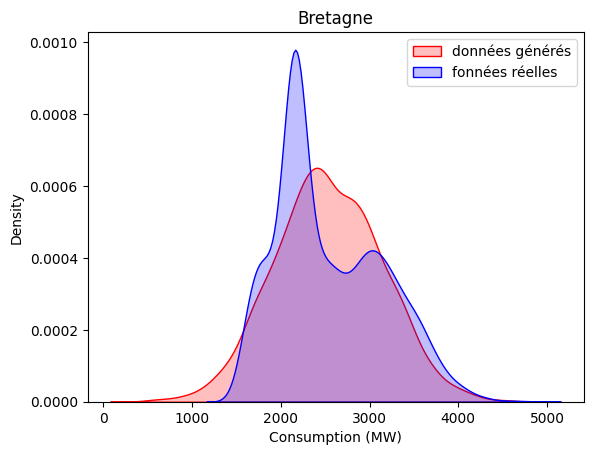

In [245]:
sns.kdeplot(data=nouv_df, x="consumption", label="données générés", color='red', fill=True)# Estimation et traçage de la kde des données générées
sns.kdeplot(data=df_region, x="consumption", label="fonnées réelles", color='blue', fill=True)# Estimation et traçage de la kde des données réelles
plt.title(region)#Ajout d'un titre pour la figure
plt.xlabel("Consommation (MW)")#On Nomme l'axe des abscisses
#Affichage de la figure avec la legend
plt.legend()
plt.show()

5. Répétez la même procédure pour les jours d'hiver (du 22/12 au 21/03), après avoir mis à jour le modèle.

In [246]:
#On définit une fonction pour l'extraction des données hivernales en une région dont la valeur est passée en paramètre.
def donnees_region_en_hiver(df_region):
  Date=pd.to_datetime(df_region['date']) # Transformation des dates de format chaine  de charactère en format datetime.
  df_sans_date=df_region.drop('date', axis=1)
  df_region1=pd.concat([df_sans_date, Date], axis=1)
  df_region_hiver=df_region1[((df_region1['date'].dt.month == 12) & (df_region1['date'].dt.day >= 22)) |
  (df_region1['date'].dt.month.isin([1, 2]))
      |(df_region1['date'].dt.month == 3) &(df_region1['date'].dt.day<=21)]
  return df_region_hiver

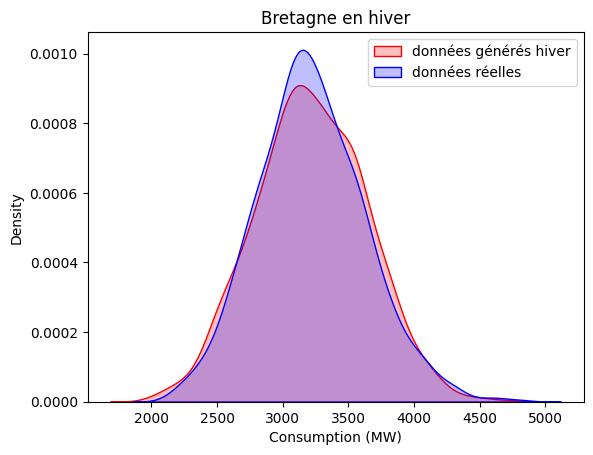

In [247]:
df_region_hiver=donnees_region_en_hiver(df_region)#Extraction des données hivernales en Bretagne.


moy_estimateur_hiver=df_region_hiver.consumption.mean()#Moyenne empirique des données hivernales en Bretagne.

var_estimateur_hiver=df_region_hiver.consumption.var(ddof=1)#Variance empirique des données hivernales en Bretagne.

n_observations_hiver = df_region_hiver.shape[0]
nouv_data_hiver = np.random.normal(moy_estimateur_hiver, np.sqrt(var_estimateur_hiver), n_observations_hiver)#nouvelles données générées pour hiver
nouv_df_hiver = pd.DataFrame(nouv_data_hiver, columns = ['consumption'])

sns.kdeplot(data=nouv_df_hiver, x="consumption", label="données générés hiver", color='red', fill=True)# Estimation et traçage de la kde des données générées
sns.kdeplot(data=df_region_hiver, x="consumption", label="données réelles", color='blue', fill=True)# Estimation et traçage de la kde des données réelles
plt.title(region +' en hiver')
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

6. Dans quel des cas l'hypothèse gaussienne est plus appropriée ?

Compte tenu des différences de forme observées dans les deux distributions, on remarque que l'hypothèse d'une distribution gaussienne semble être plus appropriée aux données de l'hiver en Bretagne (deuxième cas) que pour l'ensemble des données (premier cas).

## B. Goodness of fit

On souhaite confirmer et quantifier l'observation de la partie A.

Nous proposons la mesure de dissimilarité suivante, qui se base sur deux fonctionnes de répartitions $f$ et $g$:
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Montrez que $d(f,g) \in [0,1]$, avec $d(f,g)=0$ si et seulement si $f=g$ presque partout (pour la mesure de Lebesgue) et $d(f,g)=1$ si et seulement si $f$ et $g$ possèdent des supports disjoints.

Votre réponse :

$i)\forall x \in \chi, |f(x) - g(x)| \geq 0 $ alors
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)|\mathrm dx \geq 0
$$
On a aussi,
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx \leq \frac 1 2 \int (|f(x)| + |g(x)|) \mathrm dx
$$
et comme $\forall x \in \chi,f(x) \geq 0 \space et \space g(x) \geq 0 $ alors:
$$
d(f, g) \leq \frac 1 2 \int f(x)\mathrm dx + \frac 1 2\int g(x) \mathrm dx \leq \frac 1 2 + \frac 1 2  = 1
$$
D'où le résultat:   $d(f,g) \in [0,1]$ .

$ii)$ Commencant par montrer le premier sens:  $d(f,g)=0$ alors $ f=g$  presque partout (pour la mesure de Lebesgue)

Comme On a $d(f,g)=0$ et $\forall x \in \chi, |f(x) - g(x)| \geq 0 $ alors $|f(x) - g(x)| = 0 $ presque partout et donc on a alors $f(x) = g(x) $ presque partout d'où le résultat.

On montre maintenant le deuxieme sens: $ f=g$  presque partout (pour la mesure de Lebesgue) alors $d(f,g)=0$ .

On a $ f(x) = g(x)$  presque partout alors $|f(x) - g(x)| = 0 $ presque partout. D'où $d(f,g)=\frac 1 2 \int |f(x) - g(x)| \mathrm dx=0$.

$iii)$ Commencant par montrer le premier sens:$d(f,g)=1$ alors $f$ et $g$ possèdent des supports disjoints .

On a  $d(f, g) = 1$


Soit $J= \{x \in \chi ; f(x) \geq g(x)\}$ alors $\int_J (f(x) - g(x)) \mathrm dx + \int_{J^c} (g(x) - f(x)) \mathrm dx = 2 $

et puisque:  $ |\int_J (f(x) - g(x)) \mathrm dx| \leq 1\space et \space |\int_{J^c} (g(x) - f(x)) \mathrm dx| \leq 1 $

alors $\int_J (f(x) - g(x)) \mathrm dx = \int_{J^c} (g(x) - f(x)) \mathrm dx = 1$

et donc $\int_J g(x) \mathrm dx = \int_J f(x) \mathrm dx - 1 \leq 0$
et $\int_{J^c} f(x) \mathrm dx = \int_{J^c} g(x) \mathrm dx - 1 \leq 0$

D'où $\int_{J^c} f(x) \mathrm dx = \int_J g(x) \mathrm dx = 0$ et $\int_J f(x) \mathrm dx = \int_{J^c} g(x) \mathrm dx = 1$

Ainsi on a $J$ est le support de $f$ et $J^c$ est le support de $g$ et puisque $J\cap I^c = \emptyset$, on peut conclure que les supports de $f$ et $g$ sont disjoints.


On montre maintenant le deuxieme sens: $f$ et $g$ possèdent des supports disjoints alors$d(f,g)=1$.

On a $f$ et $g$ possède des supports disjoints donc:
$$
\forall x \in \chi, f(x) = 0\space et \space g(x) \neq 0,\space ou\space g(x) = 0\space et \space f(x) \neq 0
$$
Supposons que $F$ est le support de $f$ et  $G$ le support de $g$, donc $F \cap G= \emptyset $.
$$
d(f, g) = \frac 1 2 \int_{F \cup G} |f(x) - g(x)| \mathrm dx  = \frac 1 2 \Big(\int_F |f(x) - g(x)| \mathrm dx  + \int_G |f(x) - g(x)| \mathrm dx\Big) =  \frac 1 2 \Big(\int_F f(x) \mathrm dx  + \int_G g(x) \mathrm dx\Big) = \frac 1 2 \Big(\int f(x) \mathrm dx  + \int g(x) \mathrm dx\Big) = 1
$$



2. Pour la région Bretagne, calculez la dissimilarité entre le *kde* des données réelles et de la densité du modèle gaussien.

Pour renforcer la fiabilité de l'analyse et obtenir des résultats cohérents à chaque exécution, j'ai opté pour l'utilisation de norm.pdf au lieu de np.random.normal, qui génère une densité aléatoire à chaque exécution.

In [310]:
def dissi(df_region, moy_estimateur, var_estimateur,figure):

  x = np.linspace(0, 1.2*df_region["consumption"].max(), df_region["consumption"].max())  #On définit l'axe des abscisses
  gaussian_pdf = norm.pdf(x, loc=moy_estimateur, scale=np.sqrt(var_estimateur))#densité exacte de la loi gaussienne dont la moyenne et l'écart type correspondent à ceux des données réelles.

  kde = gaussian_kde(df_region["consumption"])  # Estimation la densité des données réelles
  kde_pdf = kde(x)#évaluation de la densité des données réelles sur l'axe des abcisses
  dissi = 0.5 * np.trapz(np.abs(kde_pdf - gaussian_pdf), x)#calcul de la dissimilarité entre le kde des données réelles et de la densité du modèle gaussien.
  if figure:
    #La courbe de l'estimateur kde des données hivernales réelles
    plt.plot(x, kde_pdf, label= 'données hivernales')

    #La courbe de la densité de la distribution de la loi gaussienne
    plt.plot(x, gaussian_pdf, label= 'données gaussiennes hivernales')
    plt.title('kde hivernales des données réelles et générées')
  return dissi
print("la valeur de la dissimilarité :",dissi(df_region, moy_estimateur, var_estimateur,False))#dissimilarité entre le kde des données réelles et de la densité du modèle gaussien pour la région de Bretagne


la valeur de la dissimilarité : 0.17913061867767927


3. Répétez la même procedure pour la région Bretagne en hiver et verifiez votre conclusion de la partie A.

la valeur de la dissimilarité en hiver est : 0.03093869462358182


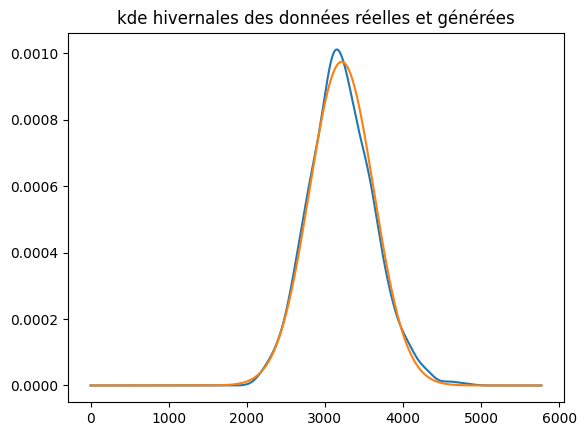

In [311]:
#dissimilarité entre le kde des données réelles et de la densité du modèle gaussien pour la région de Bretagne en hiver
print("la valeur de la dissimilarité en hiver est :",dissi(df_region_hiver, moy_estimateur_hiver, var_estimateur_hiver,True))

Il est observable que la disparité entre le noyau de densité estimée (KDE) des données réelles pendant la saison hivernale et la densité du modèle gaussien (d% = 3%) est moins prononcée que celle entre le KDE des données réelles sur l'ensemble de l'année et la densité du modèle gaussien (d% = 17.9%). Ainsi, on peut conclure que les données hivernales s'accordent davantage avec l'hypothèse gaussienne.

4. Répétez la même procedure pour toutes régions. Présentez le résultat dans un seul dataframe.

In [250]:
d=[]
# Parcours sur les regions
for i in regions:
  df_reg = df[df.region == i]#Extraction des données de la région i
  df_reg_hiver=donnees_region_en_hiver(df_reg)#Extraction des données de la région i en hiver
  moy_esti=df_reg_hiver.consumption.mean()#Moyenne empirique des données hivernales pour la région i.
  var_esti=df_reg_hiver.consumption.var(ddof=1)#Variance empirique des données hivernales pour la région i.
  d.append(dissi(df_reg_hiver, moy_esti, var_esti))#Calcule de la dissimilarité entre le kde des données réelles
  #et de la densité du modèle gaussien pour la région i en hiver
d

[0.037182574282825384,
 0.03700834472383928,
 0.030661924263356014,
 0.04276539685820185,
 0.037630488474820145,
 0.026471390244130366,
 0.04221651504877089,
 0.05354182852101971,
 0.062398797314791116,
 0.03902295047684688,
 0.03471400611946176,
 0.05156745224705905]

In [251]:
#Transformer d en DataFrame
d_regions = { 'region': regions, 'dissimililarié': d}
dissi_regions=pd.DataFrame(d_regions)
#Affichage du DataFrame obtenue
dissi_regions

,region,dissimililarié
0,Auvergne-Rhône-Alpes,0.037183
1,Bourgogne-Franche-Comté,0.037008
2,Bretagne,0.030662
3,Centre-Val de Loire,0.042765
4,Grand Est,0.037630
5,Hauts-de-France,0.026471
6,Normandie,0.042217
7,Nouvelle-Aquitaine,0.053542
8,Occitanie,0.062399
9,Pays de la Loire,0.039023


5. Quelle région a le meilleur *fit* avel le modèle gaussien en hiver ?

In [252]:
#Recherche de la région a le meilleur fit avec le modèle gaussien en hiver
region_meilleur_fit=dissi_regions[dissi_regions.dissimililarié==dissi_regions['dissimililarié'].min()].region.iloc[0]
print('La région qui a le meilleur fit avec le modèle gaussien est: ' + region_meilleur_fit)

La région qui a le meilleur fit avec le modèle gaussien est: Hauts-de-France


6. Pour ces région et saison, tracez le *kde* des données réelles et le *kde* des données générées sur le même graphique.

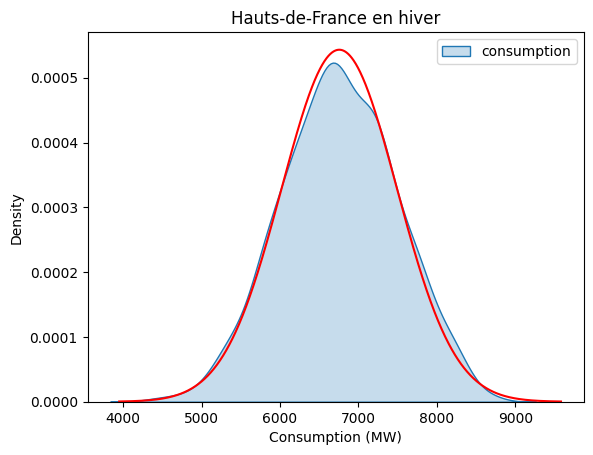

In [253]:
donnees_region_meilleur_fit_hiver=donnees_region_en_hiver(df[df.region==region_meilleur_fit])#Extraction des données hivernale de la région avec le meilleur fit en utilisant la fonction qu'on a déjà construit dans la partie précedente[question 5].


moy_esti_données_region_meilleur_fit_hiver=donnees_region_meilleur_fit_hiver.consumption.mean()#Moyenne empirique des données hivernales pour la région avec meilleur fit.
var_esti_données_region_meilleur_fit_hiver=donnees_region_meilleur_fit_hiver.consumption.var(ddof=1)#Variance empirique des données hivernales pour la région avec meilleur fit.


x = np.linspace(0.9*donnees_region_meilleur_fit_hiver["consumption"].min(), 1.1*donnees_region_meilleur_fit_hiver["consumption"].max(), 1000)#On définit l'axe des abcisses
nouv_données_hiver_reg_meilleur_fit = norm.pdf(x,loc=moy_esti_données_region_meilleur_fit_hiver, scale=np.sqrt(var_esti_données_region_meilleur_fit_hiver))#densité exacte de la loi gaussienne dont la moyenne et l'écart type correspondent à ceux des données réelles.

nouv_donnees_hiver_reg_meilleur_fit = pd.DataFrame(nouv_données_hiver_reg_meilleur_fit, columns = ['consumption'])#Transformer les nouvelles données en DataFrame
plt.plot(x,nouv_données_hiver_reg_meilleur_fit, label="nouv_Data_hiver_reg", color='red')# Traçage de la kde des données générées
sns.kdeplot(data=donnees_region_meilleur_fit_hiver, label="Data_hiver_reg", color='blue', fill=True)# Estimation et traçage de la kde des données réelles

plt.title(region_meilleur_fit + ' en hiver')
plt.xlabel("Consumption (MW)")
plt.show()

## C. Statistique bayésienne

On souhaite inclure la connaissance a priori sur l'estimation, en utilisant la statistique bayésienne.

Considérez la région Bretagne en hiver. On se focalise sur la moyenne $\mu$, en supposant que l'écart-type est connu et egal à $\sigma=400$MW. Supposons la loi a priori sur $\mu$ avec moyenne $\mu_0=3500$MW et l'écart-type $\sigma_0=500$MW.

1. Donnez la loi a posteriori pour $\mu$, en utilisant les paramètres $\sigma$, $\mu_0$, $\sigma_0$ et $n$ observations $x_1,\ldots,x_n$.

Votre réponse :

Soit:

$x=(x_1,x_2,...,x_n)$

la distribution a posteriori: $\pi(\mu | x) $

la fonction de vraisemblance: $p(x | \mu) \sim \mathcal{N}(\mu,\,\sigma^{2})^{\otimes n} $

la distribution a priori sur $\mu$: $\pi(\mu)\sim \mathcal{N}({\mu}_0,\,\sigma_0^{2})$

La loi marginale: $m(x)$



On défini alors la distribution a posteriori de $\mu$ par :
$$
\pi(\mu | x) = \frac{p(x | \mu) \cdot \pi(\mu)}{m(x)}
$$


On a:

$
\pi(\mu | x) \propto \exp\left(-\frac{1}{2\sigma^2}\sum_{i =1}^n(x_i - \mu)^2\right)  \cdot
 \exp\left(-\frac{1}{2\sigma_0^2}(\mu - \mu_0)^2\right)
 \propto \exp\left(-\frac{n\sigma_0^2 + \sigma^2}{2\sigma^2\sigma_0^2}\left( \mu^2 - 2\cdot\frac{\sigma^2{\mu}_0 + \sigma_0^2\sum_{i =1}^n x_i^2}{n\sigma_0^2 + \sigma^2}\mu\right)\right)
$





Donc $\pi(\mu | x)\sim \mathcal{N}({\mu}_{\text{posterior}},\,\sigma^2_{\text{posterior}}) $ avec :

$$
\mu_{\text{posterior}} = \frac{\sigma_0^2 \cdot \sum_{i=1}^n x_i + \sigma^2 \cdot \mu_0}{\sigma_0^2 \cdot n  + \sigma^2}
$$

$$
\sigma_{\text{posterior}}^2 = \frac{\sigma^2 \cdot \sigma_0^2 }{ n \cdot \sigma_0^2 + \sigma^2}
$$


2. Donnez les paramètres de la loi a posteriori obtenue pour chaque année de 2013 au 2023, considérée independament, dans un seul dataframe.

In [254]:
# Nos Données
sigma = 400
sigma0 = 500
mu0 = 3500
#On initialise le DataFrame de la loi a posteriori
df_posteriori = pd.DataFrame({'year': [], 'posteriori moy': [],'posteriori std': []})
# On définit une fonction qui calcule la moyenne et l'ecart type a posteriori
def posteriori(year):
  annee = df_region_hiver[df_region_hiver['date'].dt.year == year]['consumption']
  n = len(annee)
  sample_mean = annee.mean()
  posteriori_moy=(sigma**2 / (n * sigma0**2 + sigma**2)) * mu0 + (n * sigma0**2 / (n * sigma0**2 + sigma**2)) * sample_mean
  posteriori_std=sigma * sigma0 / np.sqrt(n * sigma0**2 + sigma**2)
  return posteriori_moy,posteriori_std



In [255]:
# On fait le parcours sur les années et On remplit le DataFrame qu'on a définit(le DataFrame "df_posteriori") puis on affiche le DataFrame.
for annee in range(2013,2024):
   df_posteriori = df_posteriori.append({'year': annee, 'posteriori moy': posteriori(annee)[0],
                                         'posteriori std': posteriori(annee)[1]}, ignore_index=True)
df_posteriori = df_posteriori.astype({'year': 'int32'})
print(df_posteriori)

    year  posteriori moy  posteriori std
0   2013     3343.413504       42.014582
1   2014     3118.424537       42.014582
2   2015     3167.398500       42.014582
3   2016     3207.507639       41.784716
4   2017     3251.224625       42.014582
5   2018     3315.081642       42.014582
6   2019     3195.200794       42.014582
7   2020     3145.504147       41.784716
8   2021     3341.946161       42.014582
9   2022     3165.081642       42.014582
10  2023     3117.547123       44.543540


<ipython-input-255-2b6056447513>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_posteriori = df_posteriori.append({'year': annee, 'posteriori moy': posteriori(annee)[0],
<ipython-input-255-2b6056447513>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_posteriori = df_posteriori.append({'year': annee, 'posteriori moy': posteriori(annee)[0],
<ipython-input-255-2b6056447513>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_posteriori = df_posteriori.append({'year': annee, 'posteriori moy': posteriori(annee)[0],
<ipython-input-255-2b6056447513>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_posteriori = df_posteriori.append(

3. Tracez la densité de la loi a posteriori en 2023 et le *kde* des données réelles en 2023, sur le même graphique.

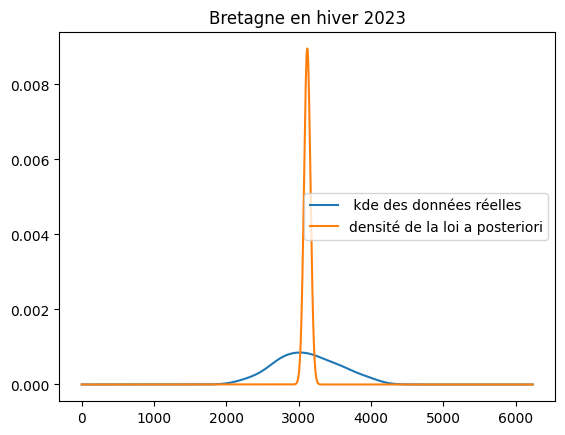

In [256]:

df_23=df_posteriori[df_posteriori['year'] == 2023]#Extraction des données de 2023


p_moy = df_23['posteriori moy']# Calcul de la moyenne de loi a posteriori en 2023
p_std = df_23['posteriori std']# Calcul de l'ecart type  de loi a posteriori en 2023
borne_nb = 2 * int(p_moy)
x = np.linspace(0,borne_nb,borne_nb)
kde_23 = gaussian_kde(df_region_hiver[df_region_hiver['date'].dt.year == 2023]['consumption'])#kde des données réelles en 2023
donnees_23_pdf=kde_23(x)# Les données réelles en 2023
loi_p = norm.pdf(x, loc= p_moy, scale=p_std)# La loi a posteriori en 2023

plt.plot(x,donnees_23_pdf,label=" kde des données réelles")# Traçage de la kde des données réelles
plt.plot(x,loi_p, label = "densité de la loi a posteriori")# Traçage de la densité de la loi à posteriori
plt.legend()
plt.title("Bretagne en hiver 2023")#Ajout d'un titre
plt.show()

*4*. Discutez les résultats, en les comparant avec ceux obtenus dans la partie A.

In [257]:
print(p_moy.values[0]) #Affichage de valeur centrale de la moyenne

3117.5471230158732


In [258]:
print(p_std.values[0])#Affichage de l'incertitude sur la moyenne

44.5435403187374


In [259]:
print(moy_estimateur_hiver) #Affichage de l'estimation ponctuelle de la moyenne

3214.1782077393077


Votre réponse :
À la différence de la partie A, où nous nous sommes contentés d'utiliser un estimateur ponctuel ($\hat{\mu}$ est d'environ 3214 $MW$) pour la moyenne, dans la section C, nous avons adopté une approche bayésienne. Cela nous a permis de construire la distribution a posteriori de la moyenne en prenant en compte à la fois la distribution a priori et la vraisemblance. Cette approche a abouti à des estimations plus fiables, car elle a tenu compte de l'incertitude (où $\mu = 3117.54 \space MW$ et $\Delta\mu$ est d'environ 90 MW) ainsi que des connaissances antérieures.

## D. Test d'hypothèse

Considérez la région Bretagne. Alors que l'écart-type en hiver est egal à 400MW, vous shouaitez tester l'hypothèse que c'était 500MW en 2023. La moyenne est supposée connue et egal à 3200MW.

1. Proposez la statisque du test pour un niveau $\alpha$.

Votre réponse :

On pose le test d'hypothèse suivant:
$$
\left\{\begin{split} H_0: X_i\sim \mathcal{N}(\mu,\,\sigma_0^{2}) \quad ∀ 1\leq i \leq n\\
 H_1: X_i\sim \mathcal{N}(\mu,\,\sigma_1^{2}) \quad ∀ 1\leq i \leq n
\end{split}\right.

soit  $x = (x_1,x_2,..x_n)$ une observation et  $X = (X_1,X_2,..X_n)$
la variable aléatoire associé à x.

$$
Appliquons le test de Neyman-Pearson (RV) :

soit $k_\alpha >0$ tel que $P_{\sigma_0}(Z(X)>k_\alpha) = \alpha $

On sait que, $ \delta^\star(x) = \mathbb{1}_{\{Z(x)>k_\alpha\}} $ est le test uniformément plus puissant de niveau $\alpha$.
$$
Z(x) = \frac{P_{\sigma_1}(x)}{P_{\sigma_0}(x)} = \left(\frac{\sigma_0}{\sigma_1}\right)^{n/ 2}\exp\left(-\left(\frac 1 {2\sigma_1^2} - \frac 1 {2\sigma_0^2}\right)\sum_{i =1}^n(x_i - \mu)^2\right)
$$

Soit:
$ \space T(x) = \sum_{i =1}^n(x_i - \mu)^2 $  alors$
$
$$
 Z(x) =\left(\frac{\sigma_0}{\sigma_1}\right)^{n/ 2}\exp\left(-\left(\frac 1 {2\sigma_1^2} - \frac 1 {2\sigma_0^2}\right)T(x)\right)
$$




Puisque on a $\sigma_0 < \sigma_1$ alors on déduit que $Z(x)$ est une fonction croissante en $T(x)$ et donc:
$\exists  t_\alpha\in\mathbb{R}$ tel que $P_{\sigma_0}(T(X)>t_\alpha)=P_{\sigma_0}(Z(X)>k_\alpha)  = \alpha$

Aussi, on a $\frac{T(x)}{\sigma^2_0} \sim\chi^2(n)$, alors  $\alpha = P_{\sigma_0}(\frac{T(x)}{\sigma^2_0}>\frac{t_\alpha}{\sigma^2_0}) = 1-F_{\frac {T(X)}{\sigma^2_0}}(\frac{t_\alpha}{\sigma^2_0})$, d'où $t_\alpha = \sigma_0^2 q^{\chi^2(n)}_{1-\alpha}$.



2. Donnez le résultat de ce test pour $\alpha=1\%$.

In [306]:
#Nos données
sigma0 = 400
mu = 3200
alpha = 0.01
#extraction des données hivernales en Bretagne pour l'année 2023 (du 1er janvier jusqu'a 21 mars).
donnees_Bretagne_23 = df_region_hiver[df_region_hiver['date'].dt.year == 2023 ]

n = len(donnees_Bretagne_23)#Calcul du degrées de liberté

t_alpha = (sigma0**2) * chi2.ppf(1-alpha, n)# Calcul du seuil t_alpha
t = np.sum((donnees_Bretagne_23['consumption'] - mu)**2)# Calcul de la statistique qu'on appele t
#On fait maintenant le test d'hypothèse:
test = t<t_alpha
if(test):
  print("l'hypothèse H0 est accepté")
else:
  print("l'hypothèse H0 est rejeté")


l'hypothèse H0 est accepté


14600063

## E. Test d'indépendence

Considérez la consomation d'electicité en Bretagne et en Provence-Alpes-Côte d'Azur en hiver.

1. Visualisez la loi jointe de la consomation dans ces 2 régions en utilisant la librarie **seaborn**.

In [261]:
df_hiver_provence = donnees_region_en_hiver(df[df.region == "Provence-Alpes-Côte d'Azur"])# Extraction des données relatifs à la consomation d'electicité en Provence-Alpes-Côte d'Azur en hiver
#Création d'un DataFrame de la loi jointe de la consommation dans ces deux régions, renommer les colonnes et affichage du DataFrame crée
df_hiver_deux_regions = pd.merge(df_region_hiver[['consumption','date']],df_hiver_provence[['consumption','date']], on ='date')
df_hiver_deux_regions = df_hiver_deux_regions[['date','consumption_x','consumption_y']].rename(columns = {'consumption_x':'consumption_Bretagne','consumption_y':'consumption_provence'})
print(df_hiver_deux_regions)

          date  consumption_Bretagne  consumption_provence
0   2013-01-01                  2595                  5369
1   2013-01-02                  3195                  5834
2   2013-01-03                  3157                  5948
3   2013-01-04                  3142                  5974
4   2013-01-05                  2859                  5580
..         ...                   ...                   ...
977 2023-03-17                  2609                  4442
978 2023-03-18                  2309                  4258
979 2023-03-19                  2206                  4116
980 2023-03-20                  2672                  4257
981 2023-03-21                  2618                  4277

[982 rows x 3 columns]


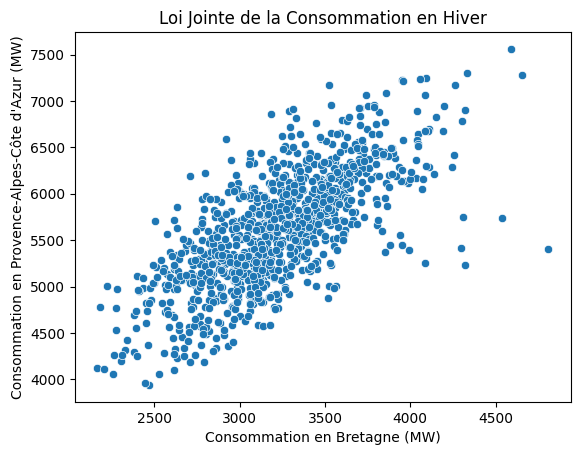

In [262]:
#Visualisation la loi jointe de la consomation dans ces 2 régions en utilisant la librarie seaborn.
sns.scatterplot(data=df_hiver_deux_regions, x="consumption_Bretagne", y="consumption_provence")
plt.title("Loi Jointe de la Consommation en Hiver")
plt.xlabel("Consommation en Bretagne (MW)")
plt.ylabel("Consommation en Provence-Alpes-Côte d'Azur (MW)")
plt.show()

2. Est-ce que vous pensez que la consomation dans ces 2 régions est indépendante ?

In [263]:
#On calcul le coefficient d'autocorrelation en utilisant corr avec la méthode "pearson" puis on affiche le résultat.
corr=df_hiver_deux_regions[['consumption_Bretagne','consumption_provence']].corr(method='pearson')
print('La correlation entre les deux regions est \n ' , corr)

La correlation entre les deux regions est 
                        consumption_Bretagne  consumption_provence
consumption_Bretagne               1.00000               0.71678
consumption_provence               0.71678               1.00000


Votre réponse : Selon le coefficient de corrélation, il est évident que les deux régions présentent une dépendance, car la corrélation est supérieure à 0,5.

3. Proposez le test du Chi-2 pour l'indépendance de la consomation

---

dans ces deux régions pour un niveau $\alpha$.

Votre réponse :

Test du Chi-Deux pour l'Indépendance de la consommation  entre Bretagne et Provence-Alpes-Côte d'Azur:

On considère deux variables aléatoires $X=(X_1, X_2..,X_n)$ et $Y=(Y_1, Y_2..,Y_n)$ et on souhaite tester le fait que ces deux variables sont indépendantes. Dans notre cas, $X$ désigne la consommation d'éléctricité en Bretagne et $Y$ désigne la consommation d'éléctricité en Provence-Alpes-Côte d'Azur. L'hypothèse à tester est l'indépendance de la consommation entre les deux régions.

Soit:

$$
\left\{\begin{split} H_0:X \perp Y \\
  H_1:  X \not \perp Y
\end{split}\right.
$$



On choisi deux partitions:
$A_1,...,A_K$ et $B_1,..., B_L$  des espaces de valeurs correspondants et soit:

$N_{i,j}=\sum_{t=1}^n \mathbb{1}_\text{{$X_t \in A_i, Y_t \in B_j$}}$ , $N_{i}=\sum_{t=1}^n \mathbb{1}_\text{{$X_t \in A_i$}}$ et $N_{j}=\sum_{t=1}^n \mathbb{1}_\text{{$X_t \in B_j$}}$


**Statistique du test:**

La statistique du test du Chi-2 est calculée de la manière suivante :

$$ T(X,Y) = \sum_{i=1}^K \sum_{j=1}^L \frac{{(N_{i,j} - \frac {N_{i}N_{j}} n)^2}}{{\frac {N_{i}N_{j}} n}} \stackrel{d}{\rightarrow} \chi^2((K-1)(L-1)) \space \text{lorsque n tend vers l'infini} $$


Avec $(K-1)(L-1)$=(Nombre de Lignes - 1) * (Nombre de Colonnes - 1)=Degrés de liberté.


donc le test est: $δ(x, y) = \mathbb{1}_\text{{$T(x,y)>c_\alpha$}}$
avec $\alpha=P_0(T(X,Y)>c_\alpha)$ d'où:

 si $ T(x, y) > c_\alpha$ alors $ H_0$ est rejetée et on dit que les consommations d'électricité en Bretagne et en Provence-Alpes-Côte d'Azur ne sont pas indépendantes.

 Sinon $H_0$ est acceptée et on dit que les consommations d'électricité en Bretagne et en Provence-Alpes-Côte d'Azur sont indépendantes.


4. Donnez le résultat de ce test pour $\alpha=1\%$.

In [278]:
#On effectue le binning avec des intervalles égaux, c'est à dire on divise les données en plages de valeurs égales.
#On choisi d'effectuer le bining avec 3 intervalles.
def binning(donnees):
  n=3
  intervalle = int(np.ceil((donnees.max() - donnees.min())/n))
  return(intervalle,n)

In [279]:
(intervalle1,n1) = binning(df_hiver_deux_regions['consumption_Bretagne'])
(intervalle2,n2) = binning(df_hiver_deux_regions['consumption_provence'])
print(intervalle1,n1,intervalle2,n2)

881 3 1207 3


In [280]:
m1=np.min(df_hiver_deux_regions['consumption_Bretagne'])
m2=np.min(df_hiver_deux_regions['consumption_provence'])
bins_i=[intervalle1*i+m1 for i in range(n1+1)]
bins_i[0]=bins_i[0]-1
bins_j=[intervalle2*j+m2  for j in range(n2+1)]
bins_j[0]=bins_j[0]-1
Bretagne = pd.cut(df_hiver_deux_regions['consumption_Bretagne'], bins_i)
Provence=pd.cut(df_hiver_deux_regions['consumption_provence'], bins_j)


In [281]:
# Création de la table de contingence en utilisant crosstab puis affichage du résultat
table_de_contingence = pd.crosstab(Bretagne, Provence)
table_de_contingence

consumption_provence,"(3939, 5147]","(5147, 6354]","(6354, 7561]"
consumption_Bretagne,,,
"(2166, 3048]",173,156,2
"(3048, 3929]",62,453,88
"(3929, 4810]",0,23,25


In [282]:
N = np.array(table_de_contingence).sum()#Calcul de nombre des echantillons
#Calcul de Ni et Nj
Ni = np.array(table_de_contingence.sum(axis = 1))
Nj = np.array(table_de_contingence.sum(axis = 0))
#Création de la matrice TH : (Ni*Nj)/n et ouis on L'affiche
TH=np.dot(Ni.reshape((n1,1)),Nj.reshape((1,n2)))/N
print(TH)

[[ 79.2107943  213.02647658  38.76272912]
 [144.30244399 388.0814664   70.61608961]
 [ 11.48676171  30.89205703   5.62118126]]


On constate que la condition $N_iN_j/N>=5$ est vérifiée avec un nombre d'intervalles égale à 3

In [283]:
A =np.sum((table_de_contingence.values - TH)**2/TH)# Calcul de la statistique qu'on appele A eo on l'affiche
print(A)

303.57320661348797


In [284]:
degrees_of_freedom = (table_de_contingence.shape[0] - 1) * (table_de_contingence.shape[1] - 1)#Le degrés de liberté
alpha = 0.01
T = chi2.ppf(1 - alpha, degrees_of_freedom)# Calcul de la quantile de khi2
#On test maintenant l'hypothèse:
if A > T:
    print("On rejète H0 : la consommation entre les deux régions n'est pas indépendante")
else:
    print("On accepte H0: la consommation entre les deux régions est indépendante")

On rejète H0 : la consommation entre les deux régions n'est pas indépendante


## F. Intervalle de confiance

Considérez la région Bretagne en hiver.

1. Donnez l'intervalle de confiance pour un niveau $\alpha=95\%$ pour la moyenne consomation d'electricité.

On définit $X = (X_1, ..., X_n)$ un échantillon de taille $n$ de la  consommation quotidienne d'electricité de la région Bretagne en hiver.

On a  $X_i ∼ N(\mu, \sigma^2) \space \forall \space 1\le i\le n \space$  avec $\mu \in \mathbb{R}$ et $\sigma^2 \in \mathbb{R_+} $ inconnu.

cherchons un intervalle de confiance de niveau $1-\alpha$ pour le paramètre $\mu$:

Comme la variance est inconnue donc on la remplace par son estimateur non biaisé $S_n^2 = \frac{1}{n - 1} \sum_{i=1}^n (X_i - \overline{X}_n)^2$ avec $\overline{X}_n=\frac{1}{n} \sum_{i=1}^n X_i$ qui représente l'estimateur sans biais de la moyenne $\mu$.

On pose $T = \varphi(X, \mu) = \frac{\sqrt{n} \left( \overline{X}_n - \mu \right)}{S_n}$.
On a d'après le cours, la variable aléatoire $T = \varphi(X, \mu)$ est distribuée suivant une loi de Student à $ (n − 1)$ degrés
de liberté quels que soient les paramètres $\mu$ et $\sigma^2$ c'est à dire, $T \sim \mathcal{T}(n - 1) \space \forall \mu $  et  $ \sigma^2 $

Notons $t_{n - 1}(p)$ le $p$-quantile de la loi $\mathcal{T}(n - 1)$.


On justifie la considéreration des intervalles symétriques par le fait que la loi de Student est unimodale et que son mode est 0.

Par conséquent, $$P_{\mu, \sigma^2} \left( -t_{n - 1} \left( 1 - \frac{\alpha}{2} \right) \le \varphi(X, \mu) \le t_{n - 1} \left( 1 - \frac{\alpha}{2} \right) \right) = 1 - \alpha$$.

En résolvant la relation précédente par rapport à $\mu$, nous obtenons, pour tout $\mu$ et $\sigma^2$:

$$P_{\mu, \sigma^2} \left( \mu \in \left[ m, M \right] \right) = 1 - \alpha$$
avec:
$$
m=\overline{X}_n-t_{n - 1}\left(1-\frac{\alpha}{2}\right) \frac{S_n} {\sqrt{n}}\quad
\text{et}\quad M =\overline{X}_n+t_{n - 1}\left(1-\frac{\alpha}{2} \right) \frac{S_n}{\sqrt{n}}
$$

In [307]:
# Données
donnees_hiver = df_region_hiver["consumption"]
n = len(donnees_hiver)
# Calcul de la moyenne et de l'écart-type empirique
moy_empirique = np.mean(donnees_hiver)
ecart_type_empirique = np.std(donnees_hiver, ddof=1)
# Définir le niveau alpha et le t_alpha(alpha-quantile de la loi de student à (n − 1) degrés de liberté)
niveau_alpha = 0.05
t_alpha = 1.962385#On definit la quantile de la loi de student avec degrès de liberté (n-1).
# On determine l'intervalle de confiance
m = moy_empirique - t_alpha * ecart_type_empirique / np.sqrt(n)
M = moy_empirique + t_alpha * ecart_type_empirique / np.sqrt(n)
print(f"l'intervalle de confiance pour un niveau  α=95%  pour la moyenne consomation d'electricité de la région Bretagne en hiver est: [{m}, {M}]")

l'intervalle de confiance pour un niveau  α=95%  pour la moyenne consomation d'electricité de la région Bretagne en hiver est: [3188.5358874430117, 3239.8205280356037]


2. Donnez le résultat du test de Student pour un niveau $5\%$ pour l'hypothèse null que la moyenne consomation en 2023 est egal à 3100MW.

In [309]:
# Données
consommation_bretagne_hiver_23 = donnees_Bretagne_23["consumption"]
n_23 = len(consommation_bretagne_hiver_23)

# Calcul de la moyenne et de l'écart-type empirique
moy_empirique_23 = np.mean(consommation_bretagne_hiver_23)
var_empirique_23 = np.std(consommation_bretagne_hiver_23, ddof=1)

# Définir le niveau alpha et le t_alpha(alpha-quantile de la loi de student à (n − 1) degrés de liberté)
alpha = 0.05
t_alpha = 1.9904#On definit la quantile de la loi de student avec degrès de liberté (n_23-1)

# On determine l'intervalle de confiance
m_23 = moy_empirique_23 - t_alpha * var_empirique_23 / np.sqrt(n_23)
M_23 = moy_empirique_23 + t_alpha * var_empirique_23 / np.sqrt(n_23)

print(f"l'intervalle de confiance pour un niveau  α=95%  pour la moyenne consomation d'electricité de la région Bretagne en hiver est: [{m_23}, {M_23}]")

# printing results
if (3100 >= m_23) & (3100 <= M_23)  :
    print("l'hypothèse null est acceptée et on dit que la moyenne consomation en 2023 est egal à 3100MW")
else :
    print("l'hypothèse null est rejetée et on dit que la moyenne consommation en 2023 est egal à 3100MW")

l'intervalle de confiance pour un niveau  α=95%  pour la moyenne consomation d'electricité de la région Bretagne en hiver est: [3020.757311532376, 3208.217688467624]
l'hypothèse null est acceptée et on dit que la moyenne consomation en 2023 est egal à 3100MW
